# E.D.A Marketplace en Línea

En este notebook se hace un E.D.A al archivo MLA_100k.jdonlines con el objetivo de comprender y entender su contenido 

#### Importamos las Librerias necesarias

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jsonlines

#### Añadimos el directorio raíz al sys.path para facilitar importaciones

In [2]:
import os

notebook_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
os.chdir(root_dir)

print("Directorio de trabajo actual después del cambio:", os.getcwd())

Directorio de trabajo actual después del cambio: c:\Users\camilo\Documents\taller12\model_training


#### Cargamos el archivo con los datos a un Dataframe

In [4]:
data = []
with jsonlines.open('Data\MLA_100k.jsonlines') as reader:
    for obj in reader:
        data.append(obj)

df = pd.DataFrame(data)
print(df.head())  
print(df.info()) 

                                      seller_address            warranty  \
0  {'comment': '', 'longitude': -58.3986709, 'id'...                None   
1  {'comment': '', 'longitude': -58.5059173, 'id'...  NUESTRA REPUTACION   
2  {'comment': '', 'longitude': -58.4143948, 'id'...                None   
3  {'comment': '', 'longitude': -58.4929208, 'id'...                None   
4  {'comment': '', 'longitude': -58.5495042, 'id'...      MI REPUTACION.   

  sub_status condition seller_contact deal_ids  base_price  \
0         []       new           None       []        80.0   
1         []      used           None       []      2650.0   
2         []      used           None       []        60.0   
3         []       new           None       []       580.0   
4         []      used           None       []        30.0   

                                            shipping  \
0  {'local_pick_up': True, 'methods': [], 'tags':...   
1  {'local_pick_up': True, 'methods': [], 'tags':...   
2 

#### Miramos la informacion del Dataset

In [12]:
# Información general del DataFrame
df.info()

# Descripción estadística de las columnas numéricas
df.describe()

# Verificar si hay valores nulos
df.isnull().sum()

# Listar las columnas del DataFrame
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   seller_address                    100000 non-null  object 
 1   warranty                          39104 non-null   object 
 2   sub_status                        100000 non-null  object 
 3   condition                         100000 non-null  object 
 4   seller_contact                    2219 non-null    object 
 5   deal_ids                          100000 non-null  object 
 6   base_price                        100000 non-null  float64
 7   shipping                          100000 non-null  object 
 8   non_mercado_pago_payment_methods  100000 non-null  object 
 9   seller_id                         100000 non-null  int64  
 10  variations                        100000 non-null  object 
 11  location                          100000 non-null  ob

Index(['seller_address', 'warranty', 'sub_status', 'condition',
       'seller_contact', 'deal_ids', 'base_price', 'shipping',
       'non_mercado_pago_payment_methods', 'seller_id', 'variations',
       'location', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'geolocation', 'sold_quantity', 'available_quantity'],
      dtype='object')

Tenemos que:
- El dataset cuenta con 100,000 filas y 48 columnas
- La mayoría de las columnas son de tipo object (37 columnas), lo que sugiere que contienen datos categóricos o cadenas de texto. Hay 5 columnas de tipo float64, 4 columnas de tipo int64 y 2 columnas de tipo bool, lo que implica la presencia de datos numéricos, booleanos y continuos.
- Se detectaron algunos valores nulos en algunas columnas como: 
    - warranty (39,104 valores no nulos de 100,000) Algunos productos no tienen la informacion sobre la garantia.
    - seller_contact (2,219 valores no nulos) Poca informacion sobre el vendedor.
    - original_price (143 valores no nulos) Muy pocos artículos tienen el precio original registrado.
    - official_store_id (818 valores no nulos) Pocos artículos están vinculados a una tienda oficial.
    - catalog_product_id (11 valores no nulos) Muy pocos productos tienen el id del catalogo registrado.
    - columnas como differential_pricing y subtitle están completamente vacías (0 non-null), por lo que no aportan información útil

##### Descripcion del contenido 

- 1. **seller_address (Dirección del vendedor):**
   - **comment**: Comentarios adicionales sobre la dirección.
   - **longitude**: Longitud geográfica de la ubicación del vendedor.
   - **id**: ID único de la dirección del vendedor.
   - **country.name**: Nombre del país del vendedor.
   - **country.id**: ID del país.
   - **address_line**: Línea de la dirección.
   - **latitude**: Latitud geográfica de la ubicación del vendedor.
   - **search_location.neighborhood.name**: Nombre del barrio donde está ubicado el vendedor.
   - **search_location.state.name**: Estado o provincia donde se encuentra el vendedor.
   - **search_location.city.name**: Nombre de la ciudad del vendedor .
   - **zip_code**: Código postal.
   - **city.name**: Nombre de la ciudad .
   - **state.name**: Nombre del estado o provincia.
   - **state.id**: ID del estado o provincia.

- 2. **warranty (Garantía):** Información sobre la garantía del producto.
- 3. **condition (Condición):** Condición del producto, puede ser nuevo o usado.
- 4. **seller_contact (Contacto del vendedor):** Información de contacto del vendedor.
- 5. **deal_ids (IDs de ofertas):** Lista de identificadores de ofertas asociadas al producto.
- 6. **base_price (Precio base):** Precio base del producto en la moneda local.

- 7. **shipping (Envío):**
   - **local_pick_up**: Indica si está disponible la recogida local.
   - **methods**: Métodos de envío disponibles.
   - **tags**: Etiquetas relacionadas con el envío.
   - **free_shipping**: Indica si el envío es gratuito.
   - **mode**: Método de envío especificado.
   - **dimensions**: Dimensiones del paquete.

- 8. **non_mercado_pago_payment_methods (Métodos de pago no mercado pago):** Métodos de pago alternativos a Mercado Pago, como Transferencia bancaria, Acordar con el comprador, Efectivo.
- 9. **seller_id (ID del vendedor):** ID único que identifica al vendedor.
- 10. **variations (Variaciones):** Variaciones del producto.
- 11. **site_id (ID del sitio):** ID del sitio de Mercado Libre donde se encuentra el producto.
- 12. **listing_type_id (Tipo de listado):** Tipo de listado en Mercado Libre, como bronze o silver.
- 13. **price (Precio):** Precio actual del producto en la moneda local.
- 14. **attributes (Atributos):** Atributos del producto.
- 15. **buying_mode (Modo de compra):** Modo de compra, como "buy_it_now".
- 16. **tags (Etiquetas):** Etiquetas adicionales asociadas al producto.
- 17. **parent_item_id (ID del ítem padre):** ID del producto padre.
- 18. **coverage_areas (Áreas de cobertura):** Áreas de cobertura para la entrega del producto.
- 19. **category_id (ID de la categoría):** ID de la categoría en la que se encuentra el producto.
- 20. **descriptions (Descripciones):** Lista de IDs que identifican las descripciones del producto.
- 21. **last_updated (Última actualización):** Fecha y hora de la última actualización del producto.
- 22. **international_delivery_mode (Modo de entrega internacional):** Modo de entrega internacional.

- 23. **pictures (Imágenes):**
   - **size**: Tamaño de la imagen.
   - **secure_url**: URL segura para acceder a la imagen.
   - **max_size**: Tamaño máximo de la imagen.
   - **url**: URL normal de la imagen.
   - **quality**: Calidad de la imagen.
   - **id**: ID único de la imagen.

- 24. **id (ID del producto):** ID único del producto.
- 25. **official_store_id (ID de tienda oficial):** ID de tienda oficial.
- 26. **differential_pricing (Precio diferencial):** Información sobre precios diferenciales.
- 27. **accepts_mercadopago (Acepta Mercado Pago):** Indica si acepta Mercado Pago.
- 28. **original_price (Precio original):** Precio original del producto.
- 29. **currency_id (ID de la moneda):** ID de la moneda utilizada para el precio.
- 30. **thumbnail (Miniatura):** URL de la imagen en miniatura del producto.
- 31. **title (Título):** Título del producto en la publicación.
- 32. **automatic_relist (Relistado automático):** Indica si el producto se relista automáticamente.
- 33. **date_created (Fecha de creación):** Fecha y hora en que se creó la publicación del producto.
- 34. **secure_thumbnail (Miniatura segura):** URL de la miniatura segura del producto.
- 35. **stop_time (Fecha de finalización):**  Fecha y hora en que finalizará la publicación del producto.
- 36. **status (Estado):** Estado de la publicación.
- 37. **video_id (ID del video):** ID de un video asociado al producto.
- 38. **catalog_product_id (ID del producto en el catálogo):** ID del producto en el catálogo.
- 39. **subtitle (Subtítulo):** Subtítulo de la publicación.
- 40. **initial_quantity (Cantidad inicial):** Cantidad inicial de productos en el inventario.
- 41. **start_time (Hora de inicio):**  Fecha y hora de inicio de la publicación.
- 42. **permalink (Enlace permanente):** Enlace permanente a la publicación.

- 43. **geolocation (Geolocalización):**
   - **latitude**: Latitud de la ubicación del producto.
   - **longitude**: Longitud de la ubicación del producto.

- 44. **sold_quantity (Cantidad vendida):**  Cantidad de productos vendidos.
- 45. **available_quantity (Cantidad disponible):** Cantidad de productos disponibles en el inventario.

#### Eliminamos las columnas que no aportan contenido o estan vacias 

In [6]:
columnas_a_eliminar = [
    'seller_address', 'deal_ids', 'seller_contact', 'non_mercado_pago_payment_methods',
    'seller_id', 'site_id', 'listing_type_id', 'id', 'official_store_id',
    'differential_pricing', 'accepts_mercadopago', 'thumbnail', 
    'secure_thumbnail', 'geolocation', 'video_id', 'automatic_relist', 
    'last_updated', 'date_created', 'start_time', 'stop_time', 'parent_item_id',
    'descriptions', 'tags', 'dimensions', 'shipping.mode'
]

df_cleaned = df.drop(columns=columnas_a_eliminar, errors='ignore')
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   warranty                     39104 non-null   object 
 1   sub_status                   100000 non-null  object 
 2   condition                    100000 non-null  object 
 3   base_price                   100000 non-null  float64
 4   shipping                     100000 non-null  object 
 5   variations                   100000 non-null  object 
 6   location                     100000 non-null  object 
 7   price                        100000 non-null  float64
 8   attributes                   100000 non-null  object 
 9   buying_mode                  100000 non-null  object 
 10  listing_source               100000 non-null  object 
 11  coverage_areas               100000 non-null  object 
 12  category_id                  100000 non-null  object 
 13  

#### Reemplazar los valores nulos por 0 en el DataFrame

In [8]:
df_cleaned = df_cleaned.fillna(0)

C:\Users\camilo\AppData\Local\Temp\ipykernel_12276\2478134008.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned = df_cleaned.fillna(0)


#### Convertimos columnas con valores de tipo dict o list a cadenas de texto (str)

In [9]:
df_cleaned = df_cleaned.applymap(lambda x: str(x) if isinstance(x, (dict, list)) else x)

C:\Users\camilo\AppData\Local\Temp\ipykernel_12276\4291120220.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df_cleaned.applymap(lambda x: str(x) if isinstance(x, (dict, list)) else x)


#### Verificar si existen duplicados en todas las columnas y cuáles columnas tienen más duplicados

In [10]:
duplicate_rows = df_cleaned.duplicated()
print(f"Cantidad de filas duplicadas: {duplicate_rows.sum()}")

duplicate_column_counts = df_cleaned.apply(lambda col: col.duplicated().sum())
print("Cantidad de duplicados por columna:")
print(duplicate_column_counts)

Cantidad de filas duplicadas: 0
Cantidad de duplicados por columna:
warranty                       89735
sub_status                     99996
condition                      99998
base_price                     89670
shipping                       99960
variations                     91807
location                       98647
price                          89669
attributes                     96547
buying_mode                    99997
listing_source                 99999
coverage_areas                 99999
category_id                    89093
international_delivery_mode    99999
pictures                        1844
original_price                 99885
currency_id                    99998
title                           1177
status                         99996
catalog_product_id             99990
subtitle                       99999
initial_quantity               99550
permalink                          0
sold_quantity                  99683
available_quantity             99532
dtype: 

#### Eliminamos duplicados del dataset

In [11]:
df_cleaned= df_cleaned.drop_duplicates() 

#### Distribución de los precios

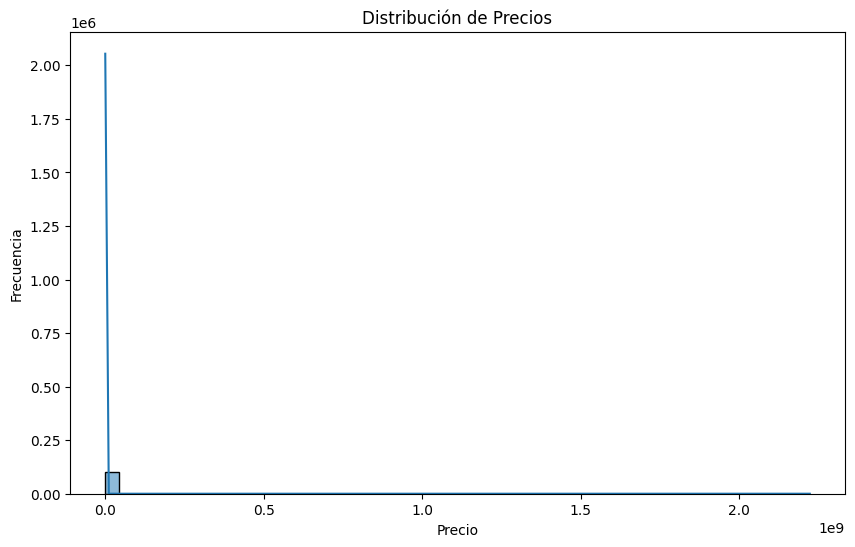

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['base_price'], bins=50, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

#### Distribución de la condición (nuevo vs usado)

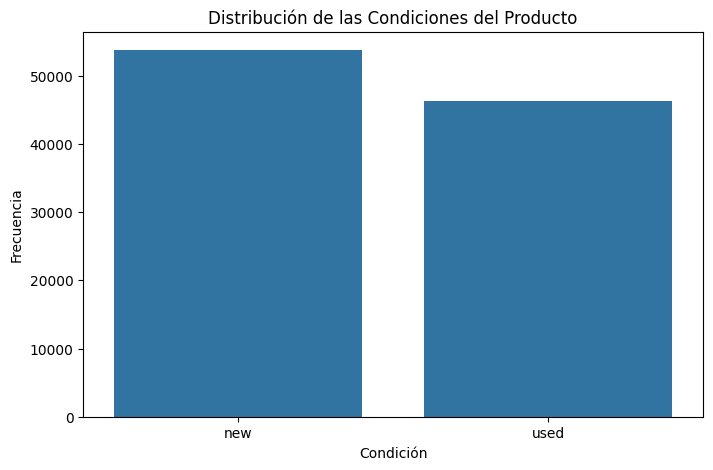

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='condition', data=df_cleaned)
plt.title('Distribución de las Condiciones del Producto')
plt.xlabel('Condición')
plt.ylabel('Frecuencia')
plt.show()

#### Mapa de calor de la correlación

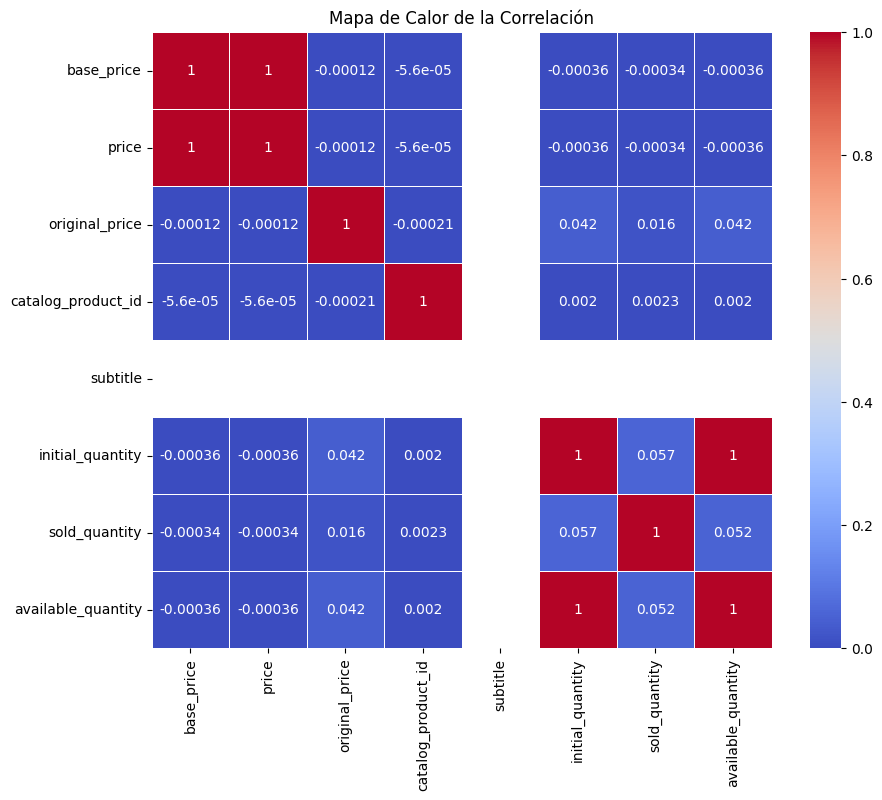

In [15]:
df_numeric = df_cleaned.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Correlación')
plt.show()

#### Ver distribución del precio según condición

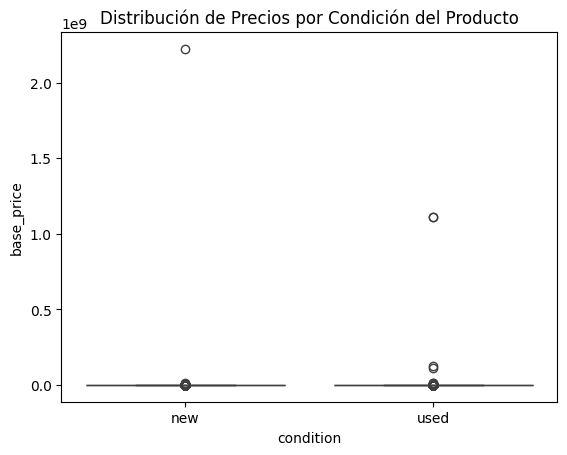

In [16]:
sns.boxplot(x='condition', y='base_price', data=df)
plt.title('Distribución de Precios por Condición del Producto')
plt.show()

#### Exportamos el Dataset

In [17]:
df_cleaned.to_csv('dataset_cleaned.csv', index=False)